In [81]:
%pylab inline
import scipy.stats
from collections import defaultdict  # default dictionary 
import copy

Populating the interactive namespace from numpy and matplotlib


/home/jillani/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['copy', 'split']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [82]:
class Node:
    def __init__(self,purity,klasslabel='',score=0,split=[],fidx=-1):
        self.lchild=None       
        self.rchild=None
        self.klasslabel=klasslabel        
        self.split=split
        self.score=score
        self.fidx=fidx
        self.purity=purity
        
        
    def set_childs(self,lchild,rchild):
        
        self.lchild=lchild
        self.rchild=rchild

        
    def isleaf(self):
        # Your Code Here
        if (self.lchild == None and self.rchild == None):
            return True
        else:
            return False
      #  print('returns true if the current node is leaf, else returns false')
    
    def isless_than_eq(self, X):
        if (X[self.fidx] < self.split):
            return True
        return False
        
    def get_str(self):        
        if self.isleaf():
            return 'C(class={},Purity={})'.format(self.klasslabel,self.purity)
        else:
            return 'I(Fidx={},Score={},Split={})'.format(self.fidx,self.score,self.split) 

In [143]:
## Your code goes here...

class DecisionTree:
    ''' Implements the Decision Tree For Classification... '''
    def __init__(self, purityp, exthreshold,maxdepth=10,tree=None):        
        self.purity=purityp
        self.exthreshold=exthreshold
        self.maxdepth=maxdepth
        self.tree=tree
        
    def train(self, X, Y):
        ''' Train Decision Tree using the given 
            X [m x d] data matrix and Y labels matrix
            
            Input:
            ------
            X: [m x d] a data matrix of m d-dimensional examples.
            Y: [m x 1] a label vector.
            
            Returns:
            -----------
            Nothing
            '''
        nexamples,nfeatures=X.shape
        ## now go and train a model for each class...
        # YOUR CODE HERE
        self.tree = self.build_tree(X,Y,self.maxdepth)

        
    def build_tree(self, X, Y, depth):
        """ 
            Function is used to recursively build the decision Tree 
          
            Input
            -----
            X: [m x d] a data matrix of m d-dimensional examples.
            Y: [m x 1] a label vector.
            
            Returns
            -------
            root node of the built tree...
        """
        nexamples, nfeatures=X.shape
        (values,counts) = np.unique(Y,return_counts=True)
        ind=np.argmax(counts)
        current_purity = counts[ind]/Y.shape[0]
        klasses,C=np.unique(Y,return_counts=True)
        # Base Cond.   
        if (depth == 0 or current_purity>=self.purity):
            (values,counts) = np.unique(Y,return_counts=True)
            ind=np.argmax(counts)
            clabel = values[ind]
            leaf = Node(current_purity, clabel)
            return leaf
        
        leftN = None
        rightN = None
        
        best_split = 0.0
        best_score = 0.0
        feature = -1
        leftIdx = None
        rightIdx = None

        for i in range (0, X.shape[1]):
            split,mingain,Xlidx,Xridx=self.evaluate_numerical_attribute(X[:,i],Y)
            if (mingain > best_score):
                best_score = mingain
                best_split = split
                feature = i
                leftIdx = Xlidx
                rightIdx = Xridx
        n = Node(purity=current_purity,klasslabel='', score=best_score, split=best_split, fidx=feature)
        n.lchild = self.build_tree(X[leftIdx], Y[leftIdx], depth-1)
        n.rchild = self.build_tree(X[rightIdx], Y[rightIdx], depth-1)
        return n
        
        
    def test(self, X):
        
        ''' Test the trained classifiers on the given set of examples 
        
                   
            Input:
            ------
            X: [m x d] a data matrix of m d-dimensional test examples.
           
            Returns:
            -----------
                pclass: the predicted class for each example, i.e. to which it belongs
        '''
        
        nexamples, nfeatures=X.shape
        pclasses=self.predict(X)
        return pclasses
        
    def calc_entropy(self, prob1, prob2, prob3):
        if (prob1 == 0):
            prob1 += 0.0000001
        if (prob2 == 0):
            prob2 += 0.0000001
        if (prob3 == 0):
            prob3 += 0.0000001
        return - (prob1*math.log(prob1,2) + prob2*math.log(prob2,2) + prob3*math.log(prob3,2))

    
    def evaluate_numerical_attribute(self,feat, Y):
        '''
            Evaluates the numerical attribute for all possible split points for
            possible feature selection
            
            Input:
            ---------
            feat: a contiuous feature
            Y: labels
            
            Returns:
            ----------
            v: splitting threshold
            score: splitting score
            Xlidx: Index of examples belonging to left child node
            Xridx: Index of examples belonging to right child node
            
        '''
        classes=np.unique(Y)
        nclasses=len(classes)
        sidx=np.argsort(feat)
        f=feat[sidx]
        sY=Y[sidx]
        split = 0.0
        score = 100.0
        i_g = 0
        p_i = 0.0 
        p_j = 0.0 
        p_k = 0.0 
        
        for i in range (0, sY.shape[0]):
            if (sY[i] == 'Iris-setosa'):
                p_i += 1
            elif (sY[i] == 'Iris-versicolor'):
                p_j += 1
            else:
                p_k += 1
        entropy = self.calc_entropy(p_i/sY.shape[0], p_j/sY.shape[0], p_k/sY.shape[0])
        for j in range(0, sY.shape[0]):
            tsplit = f[j]
            count_greater = 0
            count_lesser = 0
            count_i = 0.0  
            count_j = 0.0 
            count_k = 0.0  

            count_l = 0.0 
            count_m = 0.0 
            count_n = 0.0 
            for i in range (0, sY.shape[0]):
                if f[i] >= tsplit:
                    count_greater += 1
                    if (sY[i] == 'Iris-setosa'):
                        count_i += 1
                    elif (sY[i] == 'Iris-versicolor'):
                        count_j += 1
                    else:
                        count_k += 1
                else:
                    count_lesser += 1
                    if (sY[i] == 'Iris-setosa'):
                        count_l += 1
                    elif (sY[i] == 'Iris-versicolor'):
                        count_m += 1
                    else:
                        count_n += 1
            if (count_greater == 0 or count_lesser == 0):
                continue
            greater_entropy = self.calc_entropy(count_i/count_greater, count_j/count_greater, count_k/count_greater)
            lesser_entropy = self.calc_entropy(count_l/count_lesser, count_m/count_lesser, count_n/count_lesser)
            entropy_split = (count_greater/sY.shape[0])*greater_entropy + (count_lesser/sY.shape[0])*lesser_entropy
            information_gain = entropy - entropy_split
            if (entropy_split < score):
                score = entropy_split
                i_g = information_gain
                split = tsplit
        score = i_g
        leftChildInd = np.where(f <  split)[0]
        RightChildInd = np.where(f >= split)[0]
        
        return split, score, leftChildInd, RightChildInd          
    
    def predict(self, X):
        
        """
        Test the trained classifiers on the given example X
        
                   
            Input:
            ------
            X: [1 x d] a d-dimensional test example.
           
            Returns:
            -----------
                pclass: the predicted class for the given example, i.e. to which it belongs
        """
        pclass = []
        for i in range (0, X.shape[0]):
            temp = self._predict(self.tree, X[i,:])
            pclass.append(temp)
        return pclass
    
    def _predict(self,node, X):
        # YOUR CODE HERE
        if (node.isleaf() == True):
            temp = node.klasslabel
            return temp
        else:
            if (node.isless_than_eq(X) == True):
                return self._predict(node.lchild, X)
            else:
                return self._predict(node.rchild, X)

    def __str__(self):
        
        return self.__print(self.tree)        
        
     
    def find_depth(self):
        
        return self._find_depth(self.tree)
    
    
    def _find_depth(self,node):
        if not node:
            return
        if node.isleaf():
            return 1
        else:
            return max(self._find_depth(node.lchild),self._find_depth(node.rchild))+1
        
    def __print(self,node,depth=0):
        
        ret = ""

        # Print right branch
        if node.rchild:
            ret += self.__print(node.rchild,depth+1)

        # Print own value
        
        ret += "\n" + ("    "*depth) + node.get_str()

        # Print left branch
        if node.lchild:
            ret += self.__print(node.lchild,depth+1)
        
        return ret

In [144]:
import pandas as pd
import numpy as np
import tools as t # set of tools for plotting, data splitting, etc..

In [145]:
#load the data set
data=pd.read_csv('./iris.data')
data.columns=['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']
print (data.describe())

       SepalLength  SepalWidth  PetalLength  PetalWidth
count   149.000000  149.000000   149.000000  149.000000
mean      5.848322    3.051007     3.774497    1.205369
std       0.828594    0.433499     1.759651    0.761292
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.400000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000


In [146]:
# Get your data in matrix (X ,Y)
temp1 = data[['SepalLength','SepalWidth','PetalLength','PetalWidth']].dropna()
temp2 = data['Class'].dropna()
X = np.asarray(temp1)
Y = np.asarray(temp2)
    
print (" Data Set Dimensions=", X.shape, " True Class labels dimensions", Y.shape)   

 Data Set Dimensions= (149, 4)  True Class labels dimensions (149,)


In [147]:
print (len(Y))
feat=[0,1]
dt=DecisionTree(0.95,5,2)
feat=[0,1]
dt.classes=np.unique(Y)
dt.nclasses=len(np.unique(Y))
split,mingain,Xlidx,Xridx=dt.evaluate_numerical_attribute(X[:,0],Y)
print (split)
# You should get following result:,
# Split=5.45, entropy=0.388707191825

149
5.6


In [148]:
print (len(Y))
dt=DecisionTree(0.95,5)
dt.train(X[:,feat],Y)
g,s,xl,xr=dt.evaluate_numerical_attribute(X[:,2],Y)
print (g, s, xl, xr)

149
3.0 0.9137533408759091 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48] [ 49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66
  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102
 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120
 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 146 147 148]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


 Plotting the Decision Surface of Training Set... 


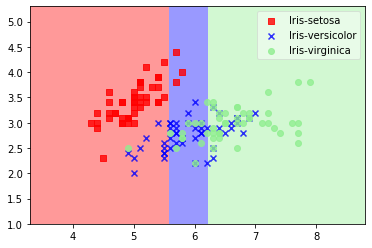

In [149]:
# %pdb
print (" Plotting the Decision Surface of Training Set... ")
t.plot_decision_regions(X[:,feat],Y,clf=dt, res=0.1, cycle_marker=True, legend=1)

In [150]:
# Split your data into training and test-set... 
# see the documentation of split_data in tools for further information...
Xtrain,Ytrain,Xtest,Ytest=t.split_data(X,Y)

print (" Training Data Set Dimensions=", Xtrain.shape, "Training True Class labels dimensions", Ytrain.shape)
print (" Test Data Set Dimensions=", Xtest.shape, "Test True Class labels dimensions", Ytrain.shape)   

 Training Data Set Dimensions= (104, 4) Training True Class labels dimensions (104,)
 Test Data Set Dimensions= (45, 4) Test True Class labels dimensions (104,)


In [151]:
# Lets train a Decision Tree Classifier on Petal Length and Width
feat=[0,1]
dt=DecisionTree(0.95,5)
dt.train(Xtrain[:,feat],Ytrain)

In [152]:
#Lets test it on the set of unseen examples...
pclasses=dt.predict(Xtest[:,feat])

# Let's See How Good we are doing

In [153]:
#Lets see how good we are doing, by finding the accuracy on the test set..
print (np.sum(pclasses==Ytest))
print ("Accuracy = ", np.sum(pclasses==Ytest)/float(Ytest.shape[0]))

31
Accuracy =  0.6888888888888889


# Lets Train on All 4 Features and all 3 classes 

In [154]:
# Split your data into training and test-set... 
# see the documentation of split_data in tools for further information...
Xtrain,Ytrain,Xtest,Ytest=t.split_data(X,Y)

print (" Training Data Set Dimensions=", Xtrain.shape, "Training True Class labels dimensions", Ytrain.shape)
print (" Test Data Set Dimensions=", Xtest.shape, "Test True Class labels dimensions", Ytrain.shape)   

 Training Data Set Dimensions= (104, 4) Training True Class labels dimensions (104,)
 Test Data Set Dimensions= (45, 4) Test True Class labels dimensions (104,)


In [155]:
dt=DecisionTree(0.95,5)
dt.train(Xtrain,Ytrain)
pclasses=dt.predict(Xtest)
#Lets see how good we are doing, by finding the accuracy on the test set..
print (np.sum(pclasses==Ytest))
print ("Accuracy = ", np.sum(pclasses==Ytest)/float(Ytest.shape[0]))

40
Accuracy =  0.8888888888888888
